'''Questions to answers
1) In which month, calories required more?
2) In which weekofday , colories required more?
3) Is More distance required more calories?
4) Is more time spend in activity increase requirement of calories?
5) Is more step increase the Calories requirement?
'''

In [2]:
#importing the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the file
df = pd.read_csv('FitBit data.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


This data is about various activity(exercise) done by different persons. This data tell us how much time a person doing the particular activities. This data also tell us how much calories should the particular person takes.
Here we have to predict the Calories columns using other columns in the data given.
There are different catogory of Activity like LightActive, SedentaryActive, VeryActive, FairlyActive etc.

In [5]:
df.shape #dataset has 457 rows and 15 columns

(457, 15)

In [6]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Here AcitivityDate is of object type. So we have to remove useful information from it by exploring it.

In [7]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate'])

In [8]:
df['Activity month']=df['ActivityDate'].dt.month

In [9]:
df['Activity_day']=df['ActivityDate'].dt.dayofweek

In [11]:
df.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Activity month                       int64
Activity_day                         int64
dtype: object

Now we don't need Id and ActivityDate further more. so we have to drop them.

In [12]:
df.drop(['Id','ActivityDate'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Activity month              0
Activity_day                0
dtype: int64

There is no missing value.

In [16]:
df['TotalDistance'].corr(df['TrackerDistance'])

0.9951217500934209

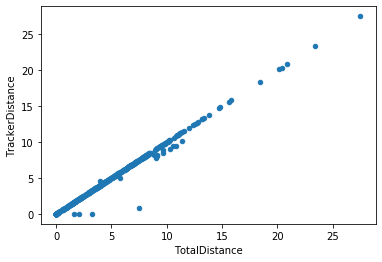

In [18]:
df.plot.scatter('TotalDistance','TrackerDistance')

TotalDistance and TrackerDistance are almost same. So we can drop any one of them.

In [20]:
df.drop('TrackerDistance',axis=1,inplace=True)

In [21]:
df.nunique()

TotalSteps                  389
TotalDistance               334
LoggedActivitiesDistance     20
VeryActiveDistance          170
ModeratelyActiveDistance    140
LightActiveDistance         295
SedentaryActiveDistance       8
VeryActiveMinutes            85
FairlyActiveMinutes          62
LightlyActiveMinutes        251
SedentaryMinutes            315
Calories                    383
Activity month                2
Activity_day                  7
dtype: int64

In [22]:
df['Activity month'].value_counts()

4    383
3     74
Name: Activity month, dtype: int64

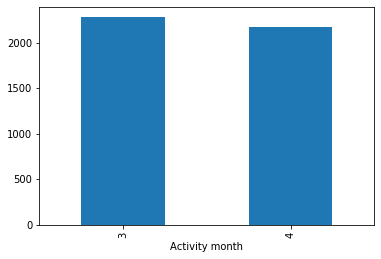

In [26]:
df.groupby('Activity month')['Calories'].mean().plot.bar()

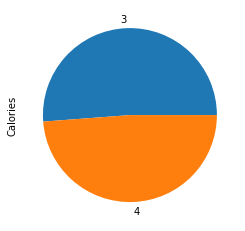

In [36]:
df.groupby('Activity month')['Calories'].mean().plot.pie()

3rd month require a little more calories as compared to 4th month.

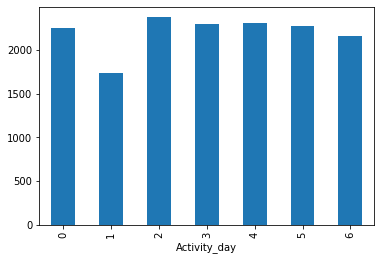

In [27]:
df.groupby('Activity_day')['Calories'].mean().plot.bar()

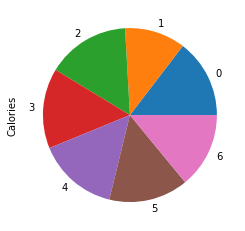

In [35]:
df.groupby('Activity_day')['Calories'].mean().plot.pie()

Calories required by 2nd day is more. But there is a little difference in calories requirement.
Calories requirement of 1st day is lowest.

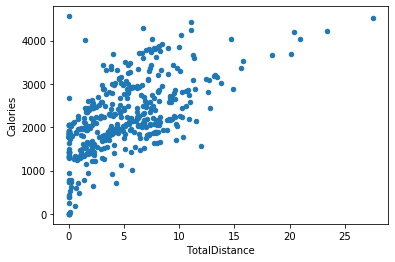

In [23]:
df.plot.scatter('TotalDistance','Calories')

In [24]:
df['TotalDistance'].corr(df['Calories'])

0.6136468464477305

Yes, we can say that increasing distance increase calories required.

In [29]:
df['TotalTime']=df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df['LightlyActiveMinutes']+df['SedentaryMinutes']

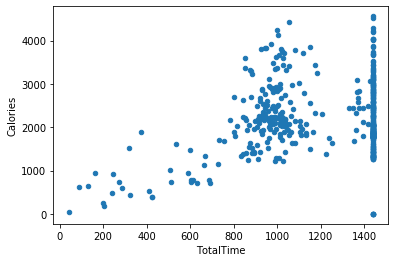

In [30]:
df.plot.scatter('TotalTime','Calories')

In [31]:
df['TotalTime'].corr(df['Calories'])

0.25193394725125273

There is little correlation of TotalTime and Calories.
So we can't say that increasing time increase the Calory requirement.

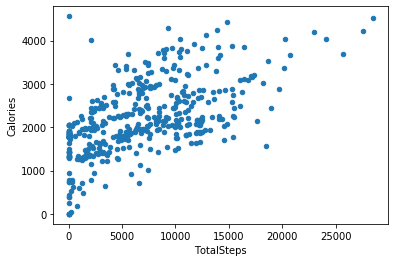

In [33]:
df.plot.scatter('TotalSteps','Calories')

In [34]:
df['TotalSteps'].corr(df['Calories'])

0.5813801894994014

Yes, TotalSteps increase no. of calories.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cf782e8d0>,
      dtype=object)

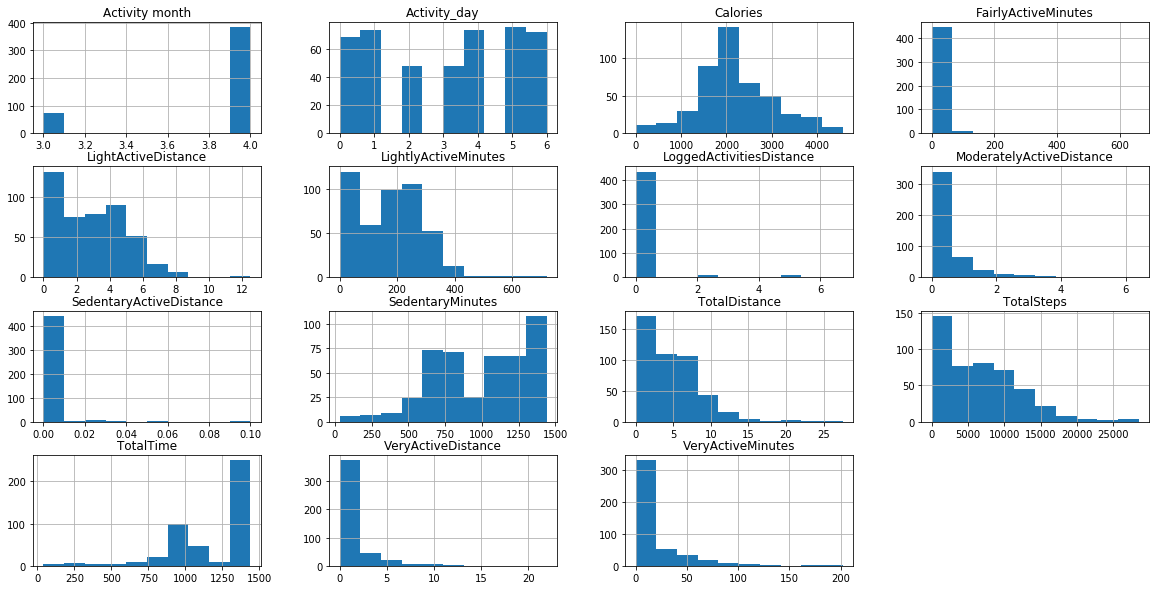

In [38]:
df.hist(figsize=(20,10))

Calories are ranging from (1500 to 3000).
Totaltime ranging(1350 to 1400 min) is more.


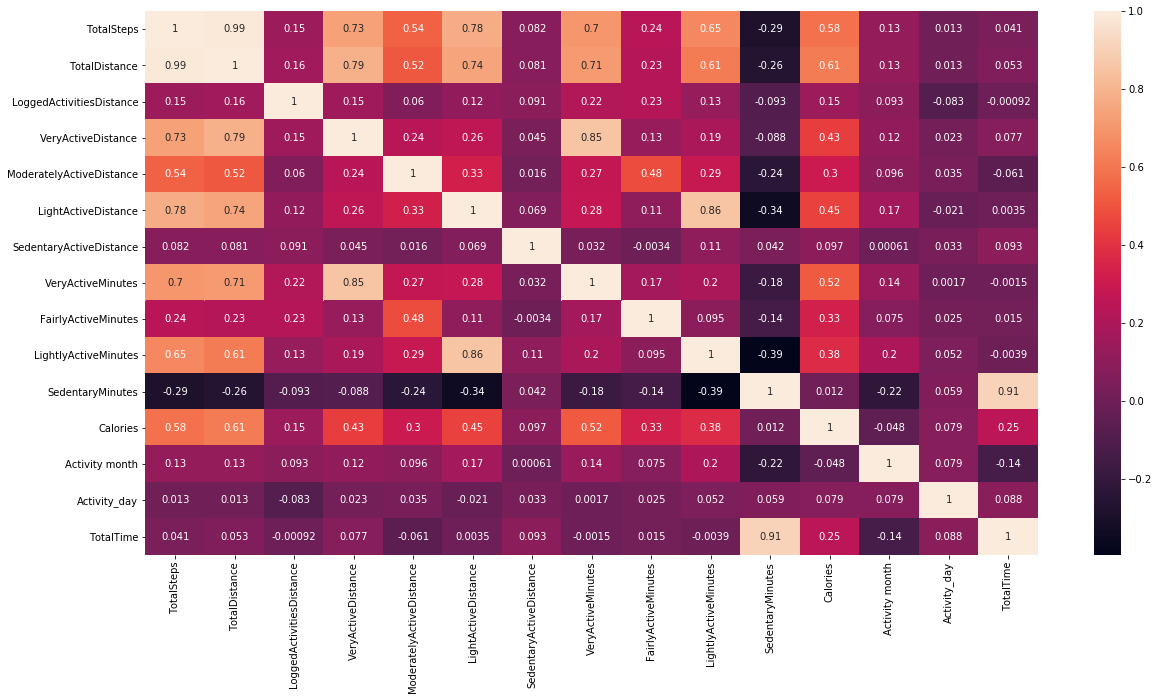

In [40]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True)

TotalSteps and TotalDistance have correlation of 0.99, So we can drop one of them.

In [41]:
df.drop('TotalSteps',axis=1,inplace=True)

In [43]:
df.nunique()

TotalDistance               334
LoggedActivitiesDistance     20
VeryActiveDistance          170
ModeratelyActiveDistance    140
LightActiveDistance         295
SedentaryActiveDistance       8
VeryActiveMinutes            85
FairlyActiveMinutes          62
LightlyActiveMinutes        251
SedentaryMinutes            315
Calories                    383
Activity month                2
Activity_day                  7
TotalTime                   174
dtype: int64

In [44]:
df['SedentaryActiveDistance'].value_counts()

0.00    419
0.01     22
0.03      6
0.04      4
0.02      2
0.06      2
0.10      1
0.05      1
Name: SedentaryActiveDistance, dtype: int64

SecondaryActiveDistance is mostly zero. So we do not need further.

In [45]:
df.drop('SedentaryActiveDistance',axis=1,inplace=True)

In [46]:
df['LoggedActivitiesDistance'].value_counts()

0.000000    433
2.092147      4
2.253081      3
4.836380      1
2.696455      1
5.456864      1
3.218688      1
3.972795      1
6.727057      1
0.055843      1
4.875990      1
1.926302      1
1.609344      1
4.835720      1
5.189850      1
4.842320      1
4.869783      1
4.901283      1
2.027773      1
4.828032      1
Name: LoggedActivitiesDistance, dtype: int64

mostly data is zero.So we don't need this columns.

In [47]:
df.drop('LoggedActivitiesDistance',axis=1,inplace=True)

In [48]:
df.nunique()

TotalDistance               334
VeryActiveDistance          170
ModeratelyActiveDistance    140
LightActiveDistance         295
VeryActiveMinutes            85
FairlyActiveMinutes          62
LightlyActiveMinutes        251
SedentaryMinutes            315
Calories                    383
Activity month                2
Activity_day                  7
TotalTime                   174
dtype: int64

In [54]:
df.columns

Index(['TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance',
       'LightActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'Activity month', 'Activity_day', 'TotalTime'],
      dtype='object')

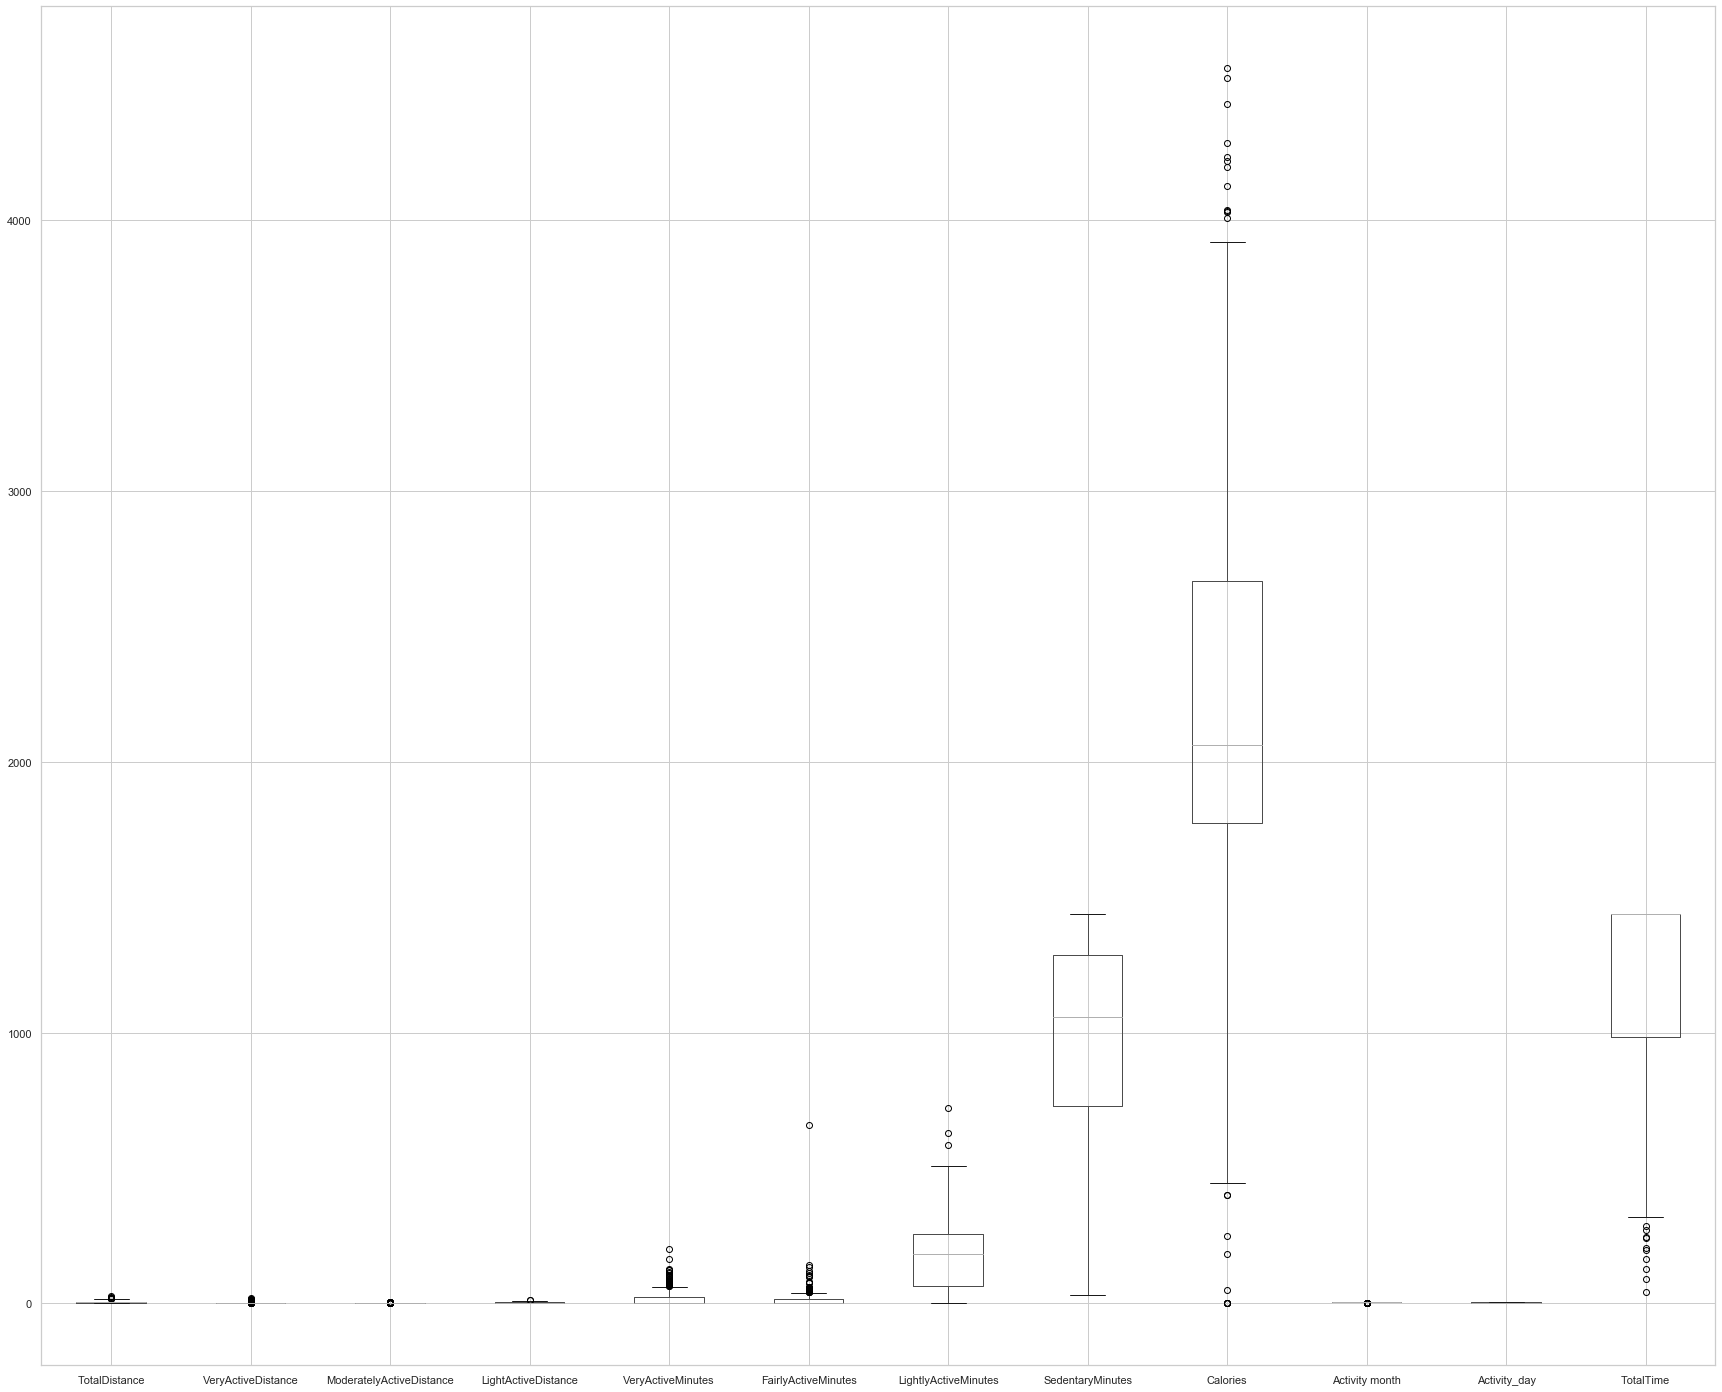

In [66]:
df.boxplot(figsize=(30,25))

In [ ]:
data have outliers.

## End